In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

In [2]:
FTSres = h5py.File('mesh_filters.hdf5', 'r')
print (FTSres.keys())
grp = FTSres['18-01-2/']

IOError: Unable to open file (File signature not found)

Let's start by loading all the A, R, T from each of the scans and making plots of them

In [3]:
A = []
R = []
T = []

In [4]:
def sqrtmap(x):
    y = x[0]**0.5
    return [x[0]**0.5, x[1]/(2*y),  x[2]/(2*y)]

In [5]:
keys = ['150GHz/Xpol/', '150GHz/Ypol/', '95GHz/Xpol/', '95GHz/Ypol/' ]
for key in keys:
    print (key)
    A += [grp[key  +'A_mcmc'][...]]
    R += [grp[key  +'R_mcmc'][...]]
    T += [grp[key  +'T_mcmc'][...]]

# A = map(sqrtmap, A) 
# R = map(sqrtmap, R) 
# T = map(sqrtmap, T) 
A = np.array(A)*100
R = np.array(R)*100
T = np.array(T)*100
A[np.isnan(A)] = 0

150GHz/Xpol/
150GHz/Ypol/
95GHz/Xpol/
95GHz/Ypol/


In [6]:
A[::2, 0]

array([-0.04527553,  0.15189797])

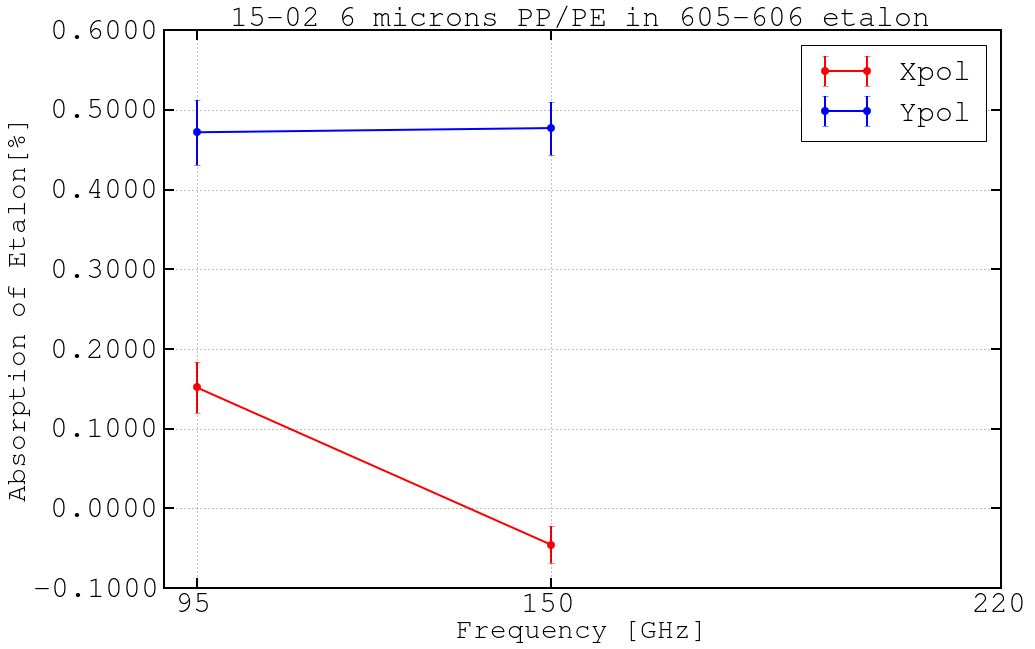

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
ax.errorbar([150, 95], A[::2, 0],yerr=[A[::2, 1], A[::2, 2]], fmt='r.-', label='Xpol', markersize=15)
ax.errorbar([150, 95], A[1::2, 0],yerr=[A[1::2, 1], A[1::2, 2]], fmt='b.-', label='Ypol', markersize=15)
ax.grid(which='both',axis='both')
ax.set_xticks([95, 150, 220])
ax.set_xticklabels(['95', '150', '220'])
ax.set_yticklabels(['{0:1.4f}'.format(t) for t in ax.get_yticks()])
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Absorption of Etalon[\%]')
ax.set_title(r'15-02 6 microns PP/PE in 605-606 etalon')
ax.legend(loc='best');
plt.savefig('18-01-2_Absorption.png')

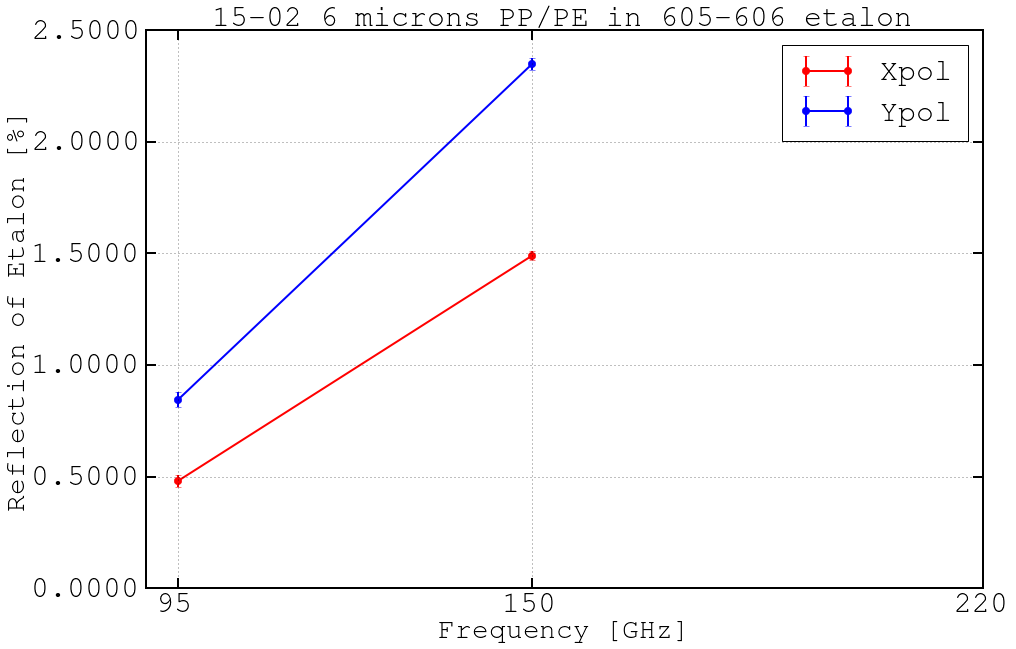

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
ax.errorbar([150, 95], R[::2, 0],yerr=[R[::2, 1], R[::2, 2]], fmt='r.-', label='Xpol', markersize=15)
ax.errorbar([150, 95], R[1::2, 0],yerr=[R[1::2, 1], R[1::2, 2]], fmt='b.-', label='Ypol', markersize=15)
ax.grid(which='both',axis='both')
ax.set_xticks([95, 150, 220])
ax.set_xticklabels(['95', '150', '220'])
ax.set_yticklabels(['{0:1.4f}'.format(t) for t in ax.get_yticks()])
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Reflection of Etalon [\%]')
ax.set_title(r'15-02 6 microns PP/PE in 605-606 etalon')
ax.legend(loc='best');
plt.savefig('15-02_Reflection.png')

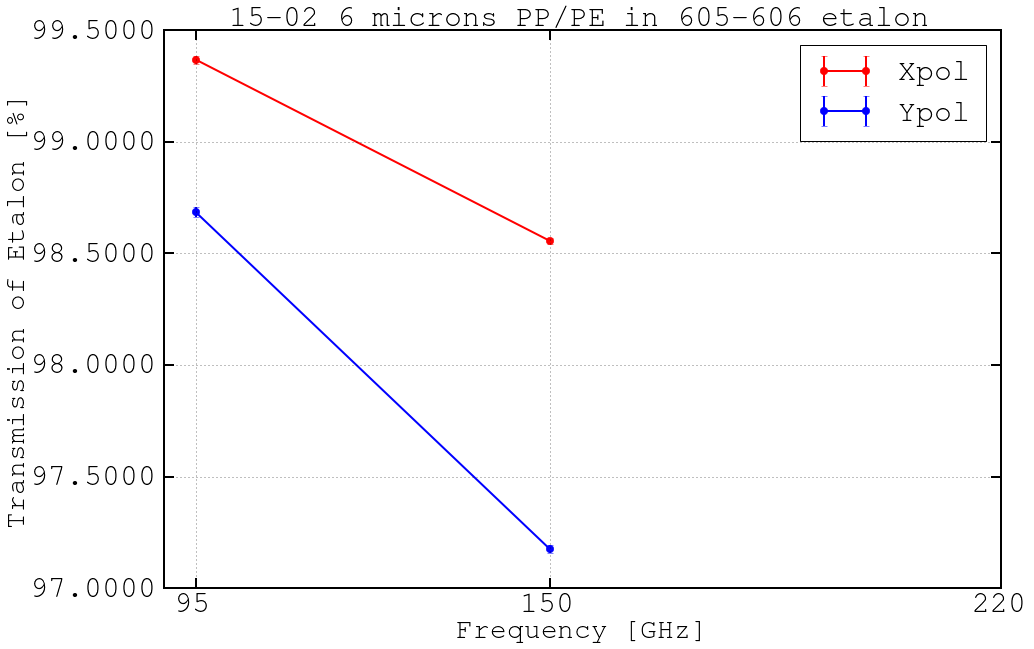

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.errorbar([150, 95], T[::2, 0],yerr=[T[::2, 1], T[::2, 2]], fmt='r.-', label='Xpol', markersize=15)
ax.errorbar([150, 95], T[1::2, 0],yerr=[T[1::2, 1], T[1::2, 2]], fmt='b.-', label='Ypol', markersize=15)
ax.grid(which='both',axis='both')
ax.set_xticks([95, 150, 220])
ax.set_xticklabels(['95', '150', '220'])
ax.set_yticklabels(['{0:1.4f}'.format(t) for t in ax.get_yticks()])
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Transmission of Etalon [\%]')
ax.set_title(r'15-02 6 microns PP/PE in 605-606 etalon')
ax.legend(loc='best');
plt.savefig('15-02_Transmission.png')

In [24]:
print (FTSres['612-613/150GHz/Xpol/A_mcmc'][...]*100)
print (FTSres['612-613/150GHz/Xpol/R_mcmc'][...]*100)
print (FTSres['612-613/150GHz/Xpol/T_mcmc'][...]*100)

[ 8.61790277  0.04713328  0.04710025]
[ 1.5382326   0.03960334  0.03959987]
[  8.98438646e+01   2.55562374e-02   2.55006721e-02]


In [25]:
print (FTSres['612-613/150GHz/Ypol/A_mcmc'][...]*100)
print (FTSres['612-613/150GHz/Ypol/R_mcmc'][...]*100)
print (FTSres['612-613/150GHz/Ypol/T_mcmc'][...]*100)

[ 5.97986491  0.0392444   0.03947717]
[ 2.13763093  0.03278693  0.03306059]
[  9.18825042e+01   2.15671033e-02   2.15741623e-02]
